In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/interview-selection-dataset/Data - Base.csv
/kaggle/input/byjus-preprocessed-dtset/num_df.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df=pd.read_csv("/kaggle/input/byjus-preprocessed-dtset/num_df.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 41 columns):
 #   Column                                                                             Non-Null Count  Dtype
---  ------                                                                             --------------  -----
 0   age                                                                                18681 non-null  int64
 1   gender                                                                             18681 non-null  int64
 2   fluency_in_english_based_on_introduction                                           18681 non-null  int64
 3   mother_tongue_influence                                                            18681 non-null  int64
 4   has_acquaintance_in_company                                                        18681 non-null  int64
 5   last_fixed_ctc_(lakhs)                                                             18681 non-null  int64
 6   curren

In [5]:
df

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation),degree_category,meta_tag_encoded,whether_joined_the_company_or_not
0,3,1,3,0,0,5,0,1,0,5,...,0,1,0,0,0,0,1,4,16960,0
1,4,1,3,0,0,0,0,0,0,2,...,0,0,0,1,1,0,0,1,8519,0
2,3,1,3,1,1,0,1,0,1,4,...,0,0,1,0,1,0,0,4,5673,1
3,2,0,3,0,0,0,0,0,0,4,...,0,0,1,0,1,0,0,4,7160,1
4,2,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,2007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,4,0,3,0,0,3,0,4,1,0,...,1,0,0,0,1,0,0,1,15232,1
18677,3,0,1,0,0,7,1,6,2,3,...,1,0,0,0,1,0,0,4,17940,0
18678,5,0,3,0,0,7,0,7,1,5,...,1,0,0,0,1,0,0,6,14368,0
18679,3,0,3,0,0,2,0,2,1,3,...,0,1,0,0,1,0,0,4,13468,0


In [6]:
X =df.drop(columns=['whether_joined_the_company_or_not'])
y = df['whether_joined_the_company_or_not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
len(X), len(y), len(X_train), len(y_train), len(X_test), len(y_test)

(18681, 18681, 14944, 14944, 3737, 3737)

In [8]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [9]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
len(train_loader), len(test_loader), len(train_dataset), len(test_dataset)

(467, 117, 14944, 3737)

In [11]:
# import torch
# import torch.nn as nn

# # Define MLP Model
# class MLP(nn.Module):
#     def __init__(self, input_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 32)
#         self.fc4 = nn.Linear(32, 1)  # Binary classification
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.3)

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc2(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc3(x))
#         x = self.dropout(x)
#         x = self.fc4(x)  # No activation (BCEWithLogitsLoss expects raw logits)
#         return x



class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x


In [12]:
# Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_size=X_train_tensor.shape[1]).to(device)

criterion = nn.BCEWithLogitsLoss()  # Binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

In [13]:
num_epochs = 100
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1).float()

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Compute Accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    test_running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1).float()

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            test_running_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    test_loss = test_running_loss / len(test_loader)
    test_acc = correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    # Print Epoch Stats
    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f}, Train Acc-------: {train_acc * 100:.4f}   |   "
          f"Test Loss: {test_loss:.4f}, Test Acc ---------: {test_acc * 100:.4f}")

Epoch [1/100] | Train Loss: 0.6809, Train Acc-------: 53.3793   |   Test Loss: 0.6710, Test Acc ---------: 53.2780
Epoch [2/100] | Train Loss: 0.6646, Train Acc-------: 53.4395   |   Test Loss: 0.6628, Test Acc ---------: 53.1442
Epoch [3/100] | Train Loss: 0.6598, Train Acc-------: 54.6440   |   Test Loss: 0.6632, Test Acc ---------: 52.6358
Epoch [4/100] | Train Loss: 0.6590, Train Acc-------: 54.9719   |   Test Loss: 0.6625, Test Acc ---------: 51.7260
Epoch [5/100] | Train Loss: 0.6583, Train Acc-------: 54.8648   |   Test Loss: 0.6624, Test Acc ---------: 53.1175
Epoch [6/100] | Train Loss: 0.6563, Train Acc-------: 55.2730   |   Test Loss: 0.6625, Test Acc ---------: 52.3147
Epoch [7/100] | Train Loss: 0.6552, Train Acc-------: 55.9355   |   Test Loss: 0.6622, Test Acc ---------: 52.4752
Epoch [8/100] | Train Loss: 0.6543, Train Acc-------: 55.8619   |   Test Loss: 0.6630, Test Acc ---------: 52.3682
Epoch [9/100] | Train Loss: 0.6545, Train Acc-------: 55.7883   |   Test Loss: 0

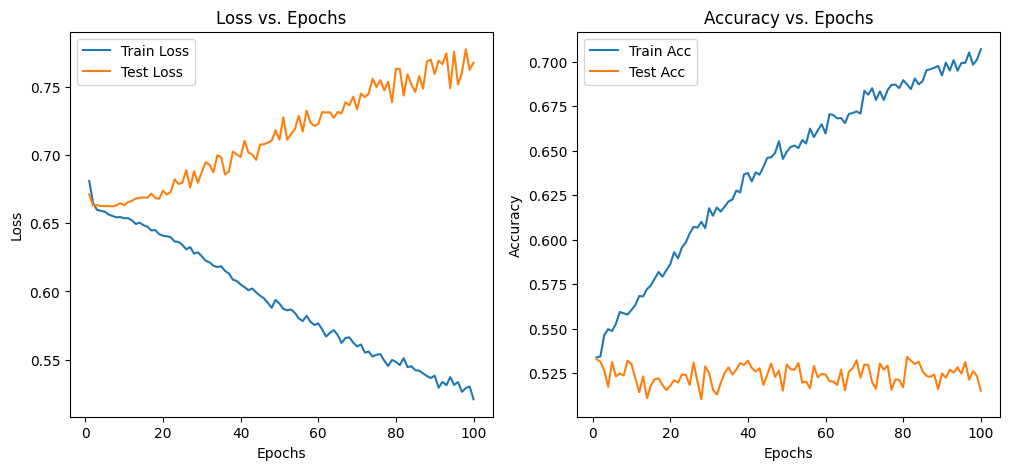

In [14]:
# Plot Loss & Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs. Epochs")

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Train Acc")
plt.plot(range(1, num_epochs+1), test_accuracies, label="Test Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs. Epochs")

plt.show()

#Working On new Model

In [15]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_size=X_train.shape[1]).to(device)


class_counts = torch.bincount(y_train_tensor.long().flatten())
class_weights = 1.0 / class_counts.float()
class_weights = class_weights / class_weights.sum()
criterion = nn.BCEWithLogitsLoss(weight=class_weights[y_train_tensor.long()].to(device))

# Optimizer & Scheduler
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [17]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [18]:
scheduler

In [19]:
def train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=20):
    model.train()
    
    # Reshape tensors to ensure correct dimensions
    y_train_tensor = y_train_tensor.view(-1, 1).to(device)
    y_test_tensor = y_test_tensor.view(-1, 1).to(device)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor.to(device)).view(-1, 1)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        # Evaluation on Test Data
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor.to(device)).view(-1, 1)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_preds = torch.sigmoid(test_outputs) > 0.5
            test_acc = (test_preds.cpu().numpy() == y_test_tensor.cpu().numpy()).mean()
        
        print(f'Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}')
        scheduler.step(test_loss)